In [2]:
pip install kaggle


Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105797 sha256=c53401daa74b0d7a7310da66ce11137d5a7be81e9fc1b9f00330099bb1697987
  Stored in directory: c:\users\dellg\appdata\local\pip\cache\wheels\ff\55\fb\b27a466be754d2a06ffe0e37b248d844f090a63b51becea85d
Successfully built kaggle



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!kaggle datasets download -d zalando-research/fashionmnist -p "C:\ornekler\jupyter\mnistOdev"


Dataset URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist
License(s): other
fashionmnist.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import requests
import torch
from PIL import Image
from transformers import *
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

In [10]:
import zipfile
import os

# Zip dosyasının tam yolu
zip_file_path = r"C:\ornekler\jupyter\mnistOdev\fashionmnist.zip"

# Çıkarılacak hedef klasör
extract_folder = r"C:\ornekler\jupyter\mnistOdev\fashion_mnist"

# Hedef klasörü oluşturalım (varsa hata vermez)
os.makedirs(extract_folder, exist_ok=True)

# Zip'i açma
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"{zip_file_path} başarıyla '{extract_folder}' dizinine çıkarıldı!")



C:\ornekler\jupyter\mnistOdev\fashionmnist.zip başarıyla 'C:\ornekler\jupyter\mnistOdev\fashion_mnist' dizinine çıkarıldı!


In [3]:
import os

dataset_dir = r"C:\ornekler\jupyter\mnistOdev\fashion_mnist"

# Eğitim ve test klasörlerini belirle
train_dir = os.path.join(dataset_dir, "train")
test_dir = os.path.join(dataset_dir, "test")

# Klasörlerin olup olmadığını kontrol et
if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(test_dir):
    os.makedirs(test_dir)

In [13]:
%pip install d2l

  Using cached numpy-1.23.5-cp311-cp311-win_amd64.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.5 MB 2.2 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/7.5 MB 2.4 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/7.5 MB 2.4 MB/s eta 0:00:03
   ----------- ---------------------------- 2.1/7.5 MB 2.3 MB/s eta 0:00:03
   ------------- -------------------------- 2.6/7.5 MB 2.3 MB/s eta 0:00:03
   ---------------- ----------------------- 3.1/7.5 MB 2.3 MB/s eta 0:00:02
   ------------------- -------------------- 3.7/7.5 MB 2.2 MB/s eta 0:00:02
   -------------------- ------------------- 3.9/7.5 MB 2.2 MB/s eta 0:00:02
   ------------------------- -------------- 4.7/7.5 MB 2.3 MB/s eta 0:00:02
   --------------------------- ------------ 5.2/7.5 MB 2.3 MB/s eta 0:00:01
   ---------------------------

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.21 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albumentations 1.4.22 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
datasets 3.3.2 requires requests>=2.32.2, but you have requests 2.31.0 which is incompatible.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import torch
from torch.utils.data import Dataset, DataLoader
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from d2l import torch as d2l  # Artık d2l sorunsuz çalışacaktır

In [5]:
# Eğitim ve test klasörleri
train_dir = os.path.join(dataset_dir, "train")
test_dir = os.path.join(dataset_dir, "test")

# Sınıf isimleri
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


In [6]:
class FashionMNISTDataset(Dataset):
    def __init__(self, image_folder):
        self.image_folder = image_folder
        self.images = []
        self.labels = []

        labels_path = os.path.join(image_folder, "labels.txt")

        with open(labels_path, "r") as f:
            lines = f.readlines()

        for line in lines:
            parts = line.strip().split()
            image_name, label = parts[0], int(parts[1])
            image_path = os.path.join(image_folder, image_name)

            self.images.append(image_path)
            self.labels.append(label)

        print(f"✅ {len(self.images)} görüntü yüklendi!")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = Image.open(self.images[idx]).convert("L")  # Grayscale
        image = np.array(image, dtype=np.float32) / 255.0  # Normalize et
        image = torch.tensor(image).unsqueeze(0)  # [1, 28, 28] şekline getir

        label = self.labels[idx]
        return image, label


In [8]:
import os

# Dosyaları listele
print(os.listdir(r"C:\ornekler\jupyter\mnistOdev\fashion_mnist"))
print(os.listdir(r"C:\ornekler\jupyter\mnistOdev\fashion_mnist\train"))  # Eğitim seti için dosya kontrolü
print(os.listdir(r"C:\ornekler\jupyter\mnistOdev\fashion_mnist\test"))   # Test seti için dosya kontrolü

['fashion-mnist_test.csv', 'fashion-mnist_train.csv', 't10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte', 'test', 'train', 'train-images-idx3-ubyte', 'train-labels-idx1-ubyte']
[]
[]


In [10]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Görüntüleri tensöre çevir ve normalize et
transform = transforms.Compose([transforms.ToTensor()])

root_folder = r"C:\ornekler\jupyter\mnistOdev\fashion_mnist"

train_dataset = torchvision.datasets.FashionMNIST(root=root_folder, train=True, download=True, transform=transform)
test_dataset  = torchvision.datasets.FashionMNIST(root=root_folder, train=False, download=True, transform=transform)


# DataLoader'ları oluştur
batch_size = 128
train_iter = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_iter = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"✅ Eğitim veri seti: {len(train_dataset)} örnek")
print(f"✅ Test veri seti: {len(test_dataset)} örnek")

100%|██████████| 26421880/26421880 [00:10<00:00, 2452132.62it/s]


Extracting C:\ornekler\jupyter\mnistOdev\fashion_mnist\FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\ornekler\jupyter\mnistOdev\fashion_mnist\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 430637.33it/s]


Extracting C:\ornekler\jupyter\mnistOdev\fashion_mnist\FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\ornekler\jupyter\mnistOdev\fashion_mnist\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2665045.13it/s]


Extracting C:\ornekler\jupyter\mnistOdev\fashion_mnist\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\ornekler\jupyter\mnistOdev\fashion_mnist\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting C:\ornekler\jupyter\mnistOdev\fashion_mnist\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\ornekler\jupyter\mnistOdev\fashion_mnist\FashionMNIST\raw

✅ Eğitim veri seti: 60000 örnek
✅ Test veri seti: 10000 örnek


In [11]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition

def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

In [12]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)), y])

def accuracy(y_hat, y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

class Accumulator:
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

def evaluate_accuracy(net, data_iter):
    if isinstance(net, torch.nn.Module):
        net.eval()
    metric = Accumulator(2)

    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]


In [13]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    train_losses, train_accuracies, test_accuracies = [], [], []

    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)

        train_losses.append(train_metrics[0])
        train_accuracies.append(train_metrics[1])
        test_accuracies.append(test_acc)

        print(f"Epoch {epoch + 1}: Loss={train_metrics[0]:.4f}, Train Acc={train_metrics[1]:.4f}, Test Acc={test_acc:.4f}")

    # **Grafikleri Çizdir**
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    axs[0].plot(range(1, num_epochs + 1), train_losses, label="Eğitim Kaybı (Loss)")
    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel("Loss")
    axs[0].set_title("Eğitim Kaybı (Loss) Grafiği")
    axs[0].legend()

    axs[1].plot(range(1, num_epochs + 1), train_accuracies, label="Eğitim Doğruluğu (Train Acc)")
    axs[1].plot(range(1, num_epochs + 1), test_accuracies, label="Test Doğruluğu (Test Acc)")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Accuracy")
    axs[1].set_title("Eğitim ve Test Doğruluk Grafiği")
    axs[1].legend()

    plt.show()

def train_epoch_ch3(net, train_iter, loss, updater):
    if isinstance(net, torch.nn.Module):
        net.train()
    metric = Accumulator(3)
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        l.sum().backward()
        updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    return metric[0] / metric[2], metric[1] / metric[2]

lr = 0.001

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)


Epoch 1: Loss=1.9115, Train Acc=0.5480, Test Acc=0.6349
Epoch 2: Loss=1.4711, Train Acc=0.6567, Test Acc=0.6555
Epoch 3: Loss=1.2565, Train Acc=0.6682, Test Acc=0.6631
Epoch 4: Loss=1.1315, Train Acc=0.6784, Test Acc=0.6740
Epoch 5: Loss=1.0493, Train Acc=0.6891, Test Acc=0.6811
Epoch 6: Loss=0.9905, Train Acc=0.6990, Test Acc=0.6915
Epoch 7: Loss=0.9457, Train Acc=0.7097, Test Acc=0.7009
Epoch 8: Loss=0.9102, Train Acc=0.7180, Test Acc=0.7090
Epoch 9: Loss=0.8813, Train Acc=0.7265, Test Acc=0.7161
Epoch 10: Loss=0.8569, Train Acc=0.7343, Test Acc=0.7222


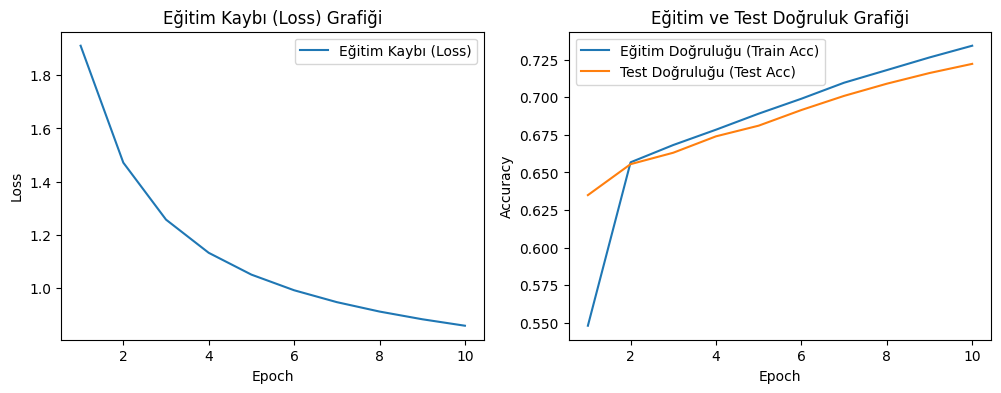

In [14]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

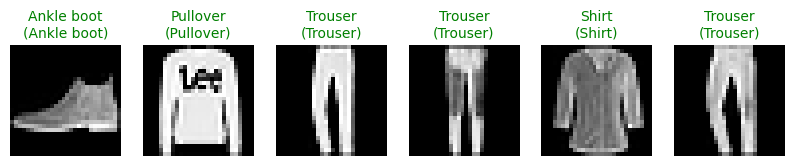

In [15]:
# **Tahmin Fonksiyonu**
def predict_ch3(net, test_iter, n=6):
    for X, y in test_iter:
        break
    X = X[:n]
    y = y[:n]

    y_hat = net(X.reshape((-1, 784))).argmax(axis=1)

    fig, axes = plt.subplots(1, n, figsize=(10, 10))

    for i in range(n):
        img = X[i].reshape(28, 28).numpy()
        true_label = class_names[y[i].item()]
        pred_label = class_names[y_hat[i].item()]

        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"{true_label}\n({pred_label})", fontsize=10,
                          color=("green" if true_label == pred_label else "red"))
        axes[i].axis('off')

    plt.show()


# **Tahminleri Gör**
predict_ch3(net, test_iter, n=6)